In [6]:
!pip install pandas pd numpy matplotlib seaborn scikit-learn

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [37]:
#Cargar datos
sp500="/content/sample_data/data_combinada.csv"

In [38]:
#Leer datos
df = pd.read_csv(sp500)
df

,date,symbol,close
0,2024-05-22,MMM,101.489998
1,2024-05-23,MMM,99.510002
2,2024-05-24,MMM,99.669998
3,2024-05-28,MMM,98.680000
4,2024-05-29,MMM,97.559998
...,...,...,...
31527,2024-08-15,ZTS,184.080002
31528,2024-08-16,ZTS,183.710007
31529,2024-08-19,ZTS,184.479996
31530,2024-08-20,ZTS,183.600006


In [42]:
#Fecha cumple con el formato datetime
df['date'] = pd.to_datetime(df['date'])
#Ordenar por symbol y date
datos = df.sort_values(by=['symbol', 'date'])

In [43]:
#Cálculo de Retornos Porcentuales Diarios
df['Return'] = df.groupby('symbol')['close'].pct_change()
df

,date,symbol,close,Return
0,2024-05-22,MMM,101.489998,NaN
1,2024-05-23,MMM,99.510002,-0.019509
2,2024-05-24,MMM,99.669998,0.001608
3,2024-05-28,MMM,98.680000,-0.009933
4,2024-05-29,MMM,97.559998,-0.011350
...,...,...,...,...
31527,2024-08-15,ZTS,184.080002,0.003817
31528,2024-08-16,ZTS,183.710007,-0.002010
31529,2024-08-19,ZTS,184.479996,0.004191
31530,2024-08-20,ZTS,183.600006,-0.004770


In [44]:
#Calcular datos Null
print(df.isnull().sum())

date        0
symbol      0
close       0
Return    501
dtype: int64


In [45]:
#Eliminar filas con datos null en la columna Return
df = df.dropna(subset=['Return'])

In [47]:
#Imprimimos y validamos que no haya datos null
print(df.isnull().sum())
df

date      0
symbol    0
close     0
Return    0
dtype: int64


,date,symbol,close,Return
1,2024-05-23,MMM,99.510002,-0.019509
2,2024-05-24,MMM,99.669998,0.001608
3,2024-05-28,MMM,98.680000,-0.009933
4,2024-05-29,MMM,97.559998,-0.011350
5,2024-05-30,MMM,98.199997,0.006560
...,...,...,...,...
31527,2024-08-15,ZTS,184.080002,0.003817
31528,2024-08-16,ZTS,183.710007,-0.002010
31529,2024-08-19,ZTS,184.479996,0.004191
31530,2024-08-20,ZTS,183.600006,-0.004770


In [52]:
#Cálculo de Indicadores de Volatilidad
volatilidad = df.groupby('symbol')['Return'].agg(['std', 'min', 'max'])
volatilidad['rango'] = volatilidad['max'] - volatilidad['min']
volatilidad_df = pd.DataFrame(volatilidad).reset_index()
volatilidad_df

,symbol,std,min,max,rango
0,A,0.019258,-0.096646,0.038547,0.135192
1,AAL,0.027474,-0.135417,0.068035,0.203451
2,AAPL,0.017211,-0.048167,0.072649,0.120816
3,ABBV,0.013816,-0.026045,0.035875,0.061919
4,ABNB,0.024058,-0.133824,0.041178,0.175002
...,...,...,...,...,...
496,XYL,0.015751,-0.056878,0.033020,0.089898
497,YUM,0.010719,-0.026045,0.026478,0.052523
498,ZBH,0.013139,-0.034316,0.033408,0.067724
499,ZBRA,0.017489,-0.059198,0.038885,0.098083


In [55]:
#Escalamiento de los Datos
scaler = StandardScaler()
volatilidad_escalada = scaler.fit_transform(volatilidad)


array([[ 0.15047724, -1.10650166, -0.46356148,  0.50130494],
       [ 1.30570281, -2.11723106,  0.41860549,  1.77103079],
       [-0.13737073,  0.15729411,  0.55665584,  0.23388549],
       ...,
       [-0.7098739 ,  0.51837849, -0.61729771, -0.75371695],
       [-0.09822207, -0.13027094, -0.45343866, -0.18898853],
       [-0.41937448,  0.58003765,  0.17495309, -0.30510096]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

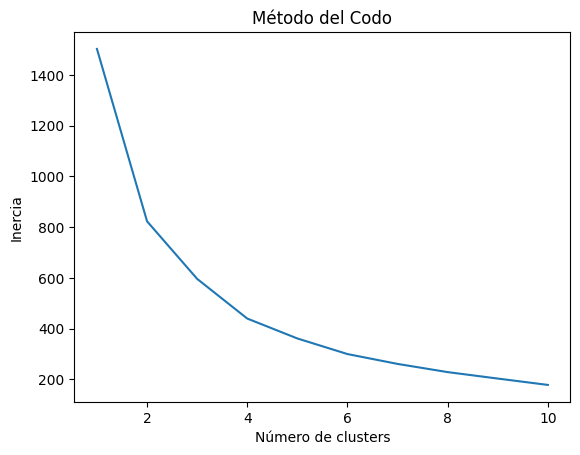

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
distortions = []
for i in range(1, 11):
     kmeans = KMeans(n_clusters=i, random_state=42)
     kmeans.fit(volatilidad_escalada[:, [0, 1, 2]])  # Assuming 'std', 'min', 'max' are in the first three columns
     distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [72]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(volatilidad_escalada)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [74]:
volatilidad_df['Cluster'] = clusters
volatilidad_df

,symbol,std,min,max,rango,Cluster
0,A,0.019258,-0.096646,0.038547,0.135192,0
1,AAL,0.027474,-0.135417,0.068035,0.203451,1
2,AAPL,0.017211,-0.048167,0.072649,0.120816,0
3,ABBV,0.013816,-0.026045,0.035875,0.061919,0
4,ABNB,0.024058,-0.133824,0.041178,0.175002,1
...,...,...,...,...,...,...
496,XYL,0.015751,-0.056878,0.033020,0.089898,0
497,YUM,0.010719,-0.026045,0.026478,0.052523,0
498,ZBH,0.013139,-0.034316,0.033408,0.067724,0
499,ZBRA,0.017489,-0.059198,0.038885,0.098083,0


In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
volatilidad_reducida = pca.fit_transform(volatilidad_escalada)

<Axes: >

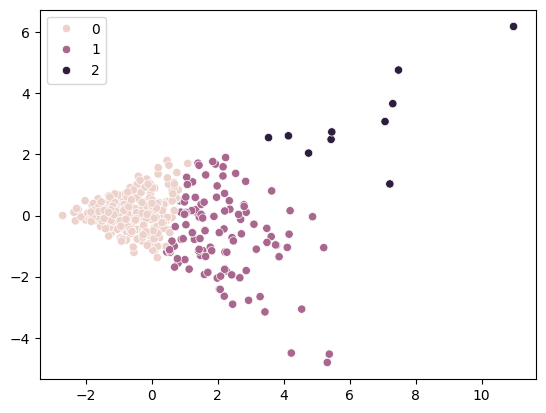

In [76]:
import seaborn as sns
sns.scatterplot(x=volatilidad_reducida[:, 0], y=volatilidad_reducida[:, 1], hue=clusters)

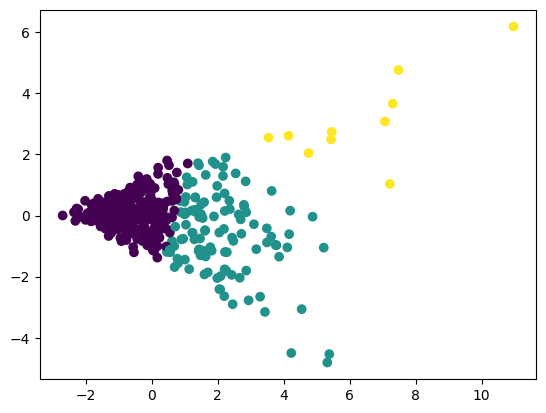

In [77]:
import matplotlib.pyplot as plt
plt.scatter(volatilidad_reducida[:, 0], volatilidad_reducida[:, 1], c=clusters)
plt.show()

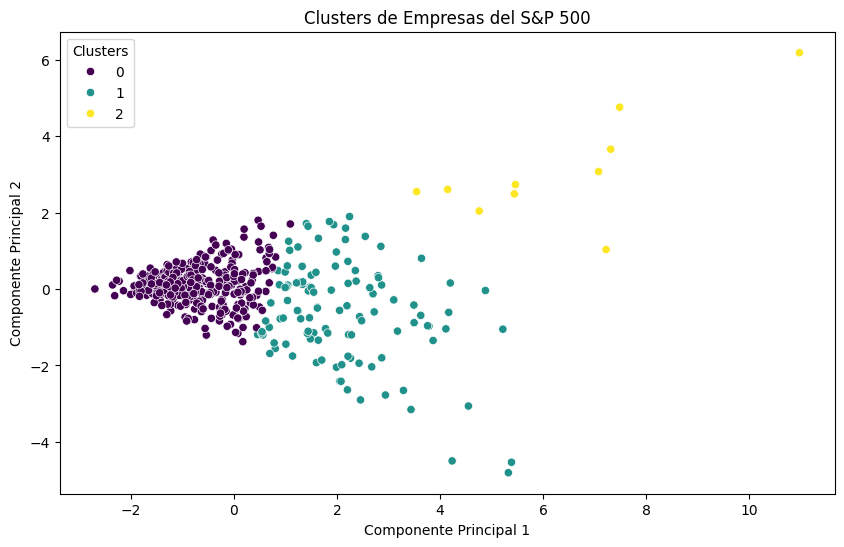

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=volatilidad_reducida[:, 0], y=volatilidad_reducida[:, 1], hue=clusters, palette='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de Empresas del S&P 500')
plt.legend(title='Clusters')
plt.show()



In [ ]:
#Análisis de Resultados
"""
El gráfico de dispersión se visualizan cluster de empresas del Sp500 ordenadas en función de sus volatilidades.
Los colores de los clusters representan la pertenencia a cada grupo de empresas según las características de volatilidad de los retornos diarios.
Las empresas en el cluster 0 (Morado) tiene una concentración más densa y más cerca al origen, indicando que son empresas con volatilidad y tiene comportamientos más estables.

Las empresas en el cluster 1 (Verde) una concentración más dispersa, lo que indica que tiene una mayor variablidad en la volatilidad en comparación del cluester 1.

Las empresas en el cluster 2 (Amarillo) este grupo está más separado en comparación de los otros dos clusters, indicando que pueden tener una volatilidad más alta.

De acuerdo al análisis realizado se puede determinar que las empresas de cluster morado representan un menor riesgo de inversion mientras que el amarillo representa un mayor riesgo de inversión por su volatilidad.
"""